In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


# Exploratory Data Analysis

Reading the Datasets

In [50]:
# Load the training and testing datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Transforimg multiclass classification to binary class
0 and 1 to 0, portraying low price
2 and 3 to 1, portrating high price

In [51]:
# Transforming the price_range column to binary classes
train_df['price_range'] = train_df['price_range'].apply(lambda x: 0 if x in [0, 1] else 1)

In [52]:
train_df = train_df.drop(columns=['three_g'])
test_df = test_df.drop(columns=['three_g'])

# Separating features and labels in training data
X = train_df.drop(columns=['price_range'])  # Assuming 'price_range' is the target
Y = train_df['price_range']

# Separating features in testing data (test labels not provided if it’s for prediction)
testing = test_df.drop(columns=['id'], errors='ignore')  # Drop 'id' if present

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(testing)

print("Data Overview:")
print(train_df.info())
print("\nFirst few rows of the data:")
print(train_df.head())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_power          2000 non-null   int64  
 1   bluetooth              2000 non-null   int64  
 2   clock_speed            2000 non-null   float64
 3   dual_sim               2000 non-null   int64  
 4   front_camera_pixels    2000 non-null   int64  
 5   four_g                 2000 non-null   int64  
 6   int_memory             2000 non-null   int64  
 7   m_dep                  2000 non-null   float64
 8   mobile_wt              2000 non-null   int64  
 9   n_cores                2000 non-null   int64  
 10  primary_camera_pixels  2000 non-null   int64  
 11  px_height              2000 non-null   int64  
 12  px_width               2000 non-null   int64  
 13  ram                    2000 non-null   int64  
 14  sc_h                   2000 non-null   in

In [53]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
Series([], dtype: int64)


In [54]:
# Get statistical summary
print("\nStatistical Summary of Numeric Features:")
print(train_df.describe())



Statistical Summary of Numeric Features:
       battery_power  bluetooth  clock_speed     dual_sim  \
count    2000.000000  2000.0000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500   
std       439.418206     0.5001     0.816004     0.500035   
min       501.000000     0.0000     0.500000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000   
50%      1226.000000     0.0000     1.500000     1.000000   
75%      1615.250000     1.0000     2.200000     1.000000   
max      1998.000000     1.0000     3.000000     1.000000   

       front_camera_pixels       four_g   int_memory        m_dep  \
count          2000.000000  2000.000000  2000.000000  2000.000000   
mean              4.309500     0.521500    32.046500     0.501750   
std               4.341444     0.499662    18.145715     0.288416   
min               0.000000     0.000000     2.000000     0.100000   
25%               1.000000     0.000000    16.000000     0.2000

C:\Users\user\AppData\Local\Temp\ipykernel_9324\2092920628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=train_df, palette="viridis")


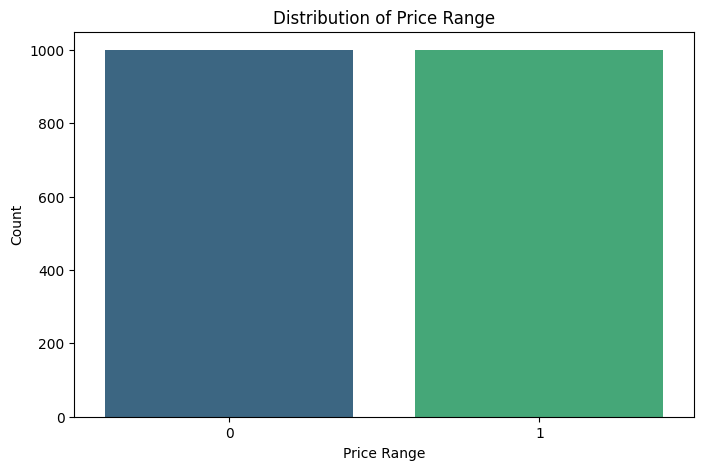

In [55]:
# Distribution of the target variable (price_range)
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=train_df, palette="viridis")
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


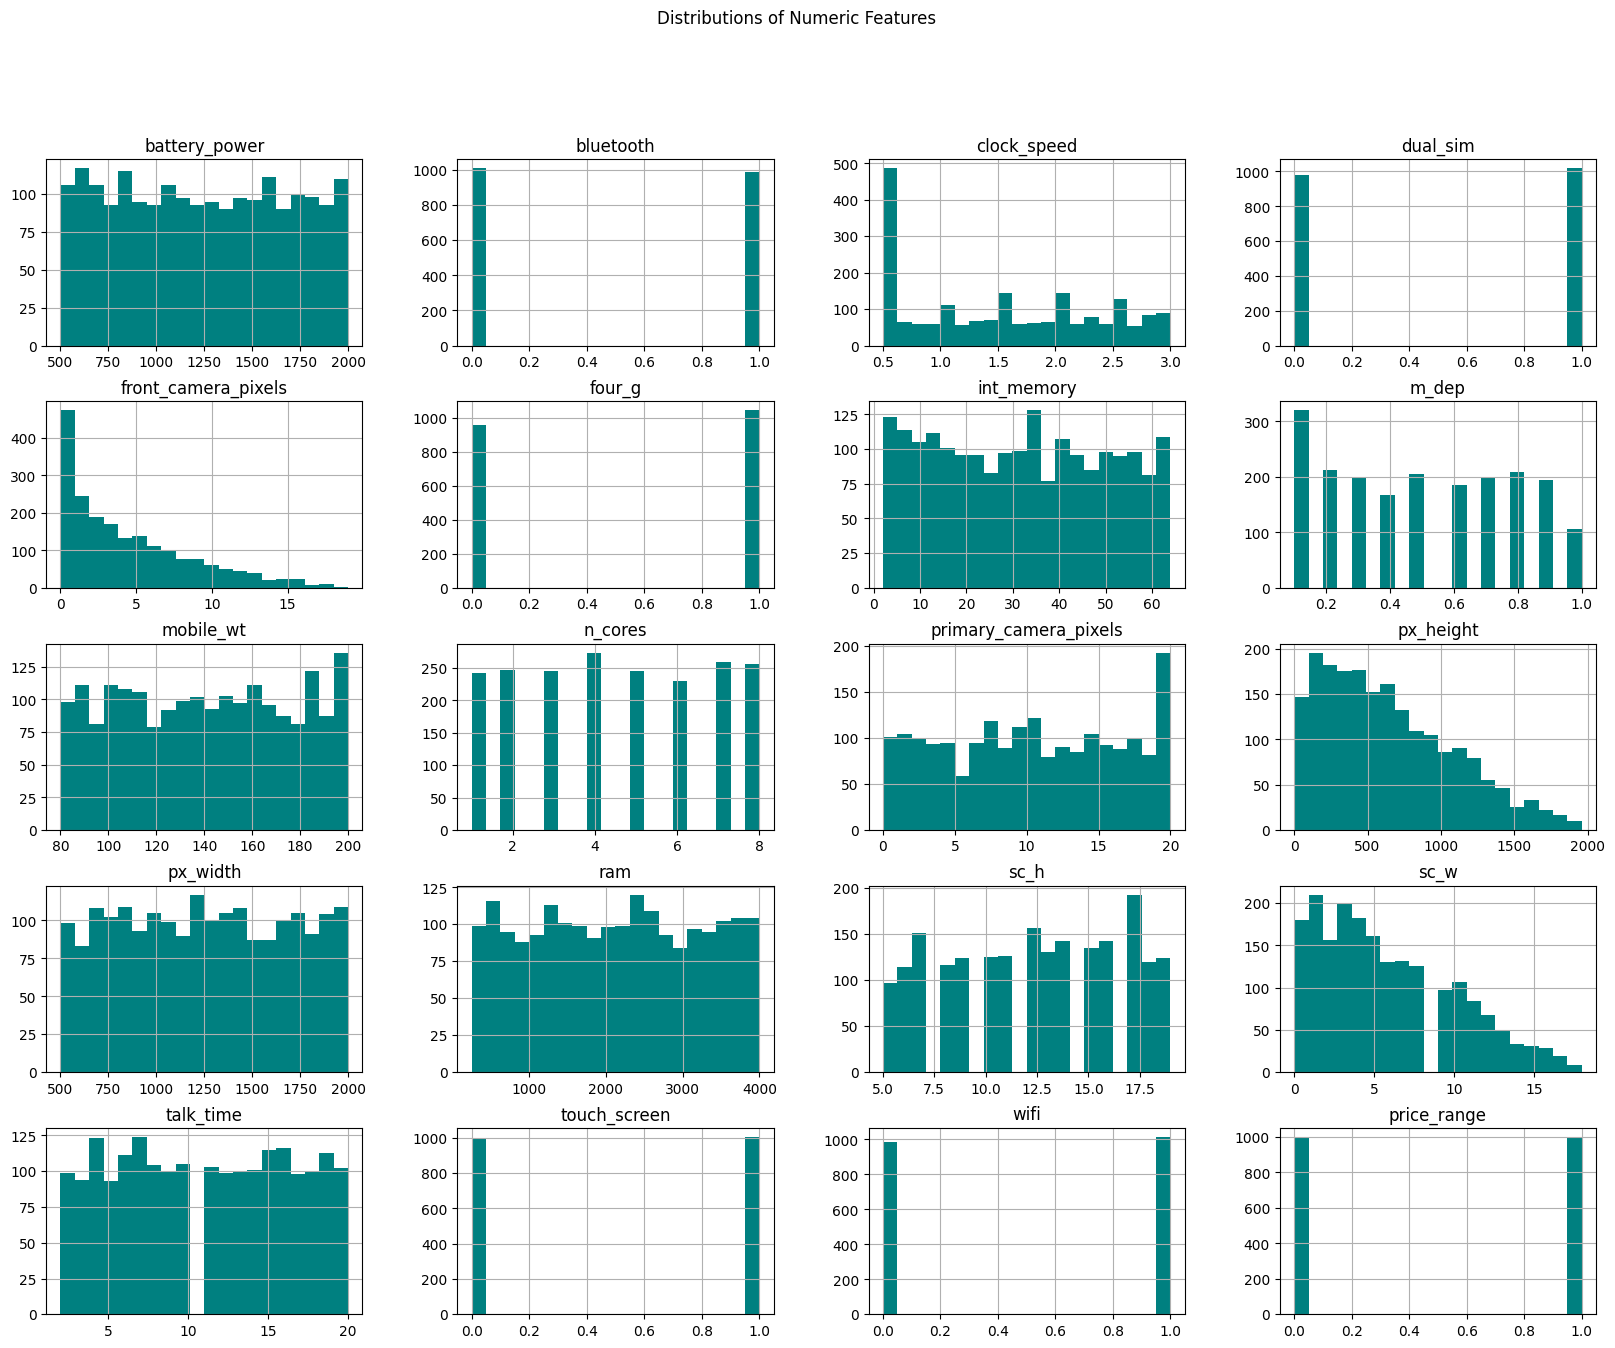

In [56]:
# Plotting distributions of numeric features
train_df.hist(bins=20, figsize=(20, 15), color='teal')
plt.suptitle("Distributions of Numeric Features")
plt.show()


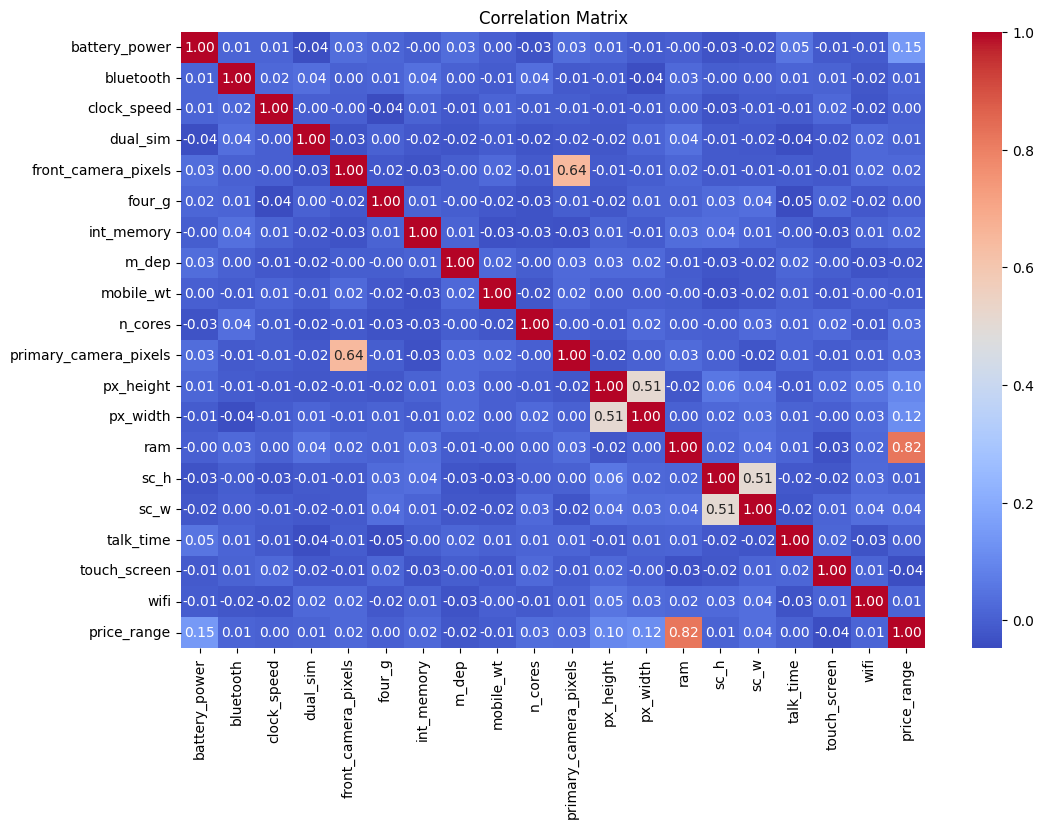

In [57]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9324\330440792.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='price_range', y=feature, data=train_df, ax=axes[i], palette="viridis")
C:\Users\user\AppData\Local\Temp\ipykernel_9324\330440792.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='price_range', y=feature, data=train_df, ax=axes[i], palette="viridis")
C:\Users\user\AppData\Local\Temp\ipykernel_9324\330440792.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='price_range', y=feature, data=train_df, ax=axes[i], palette="viridis")
C:\Users\user\AppData\Local\Temp\ipykernel_9324\330440792.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='price_range', y=feature, data=train_df, ax=axes[i], palette="viridis")
C:\Users\user\AppData\Local\Temp\ipykernel_9324\330440792.py:18: UserWarning

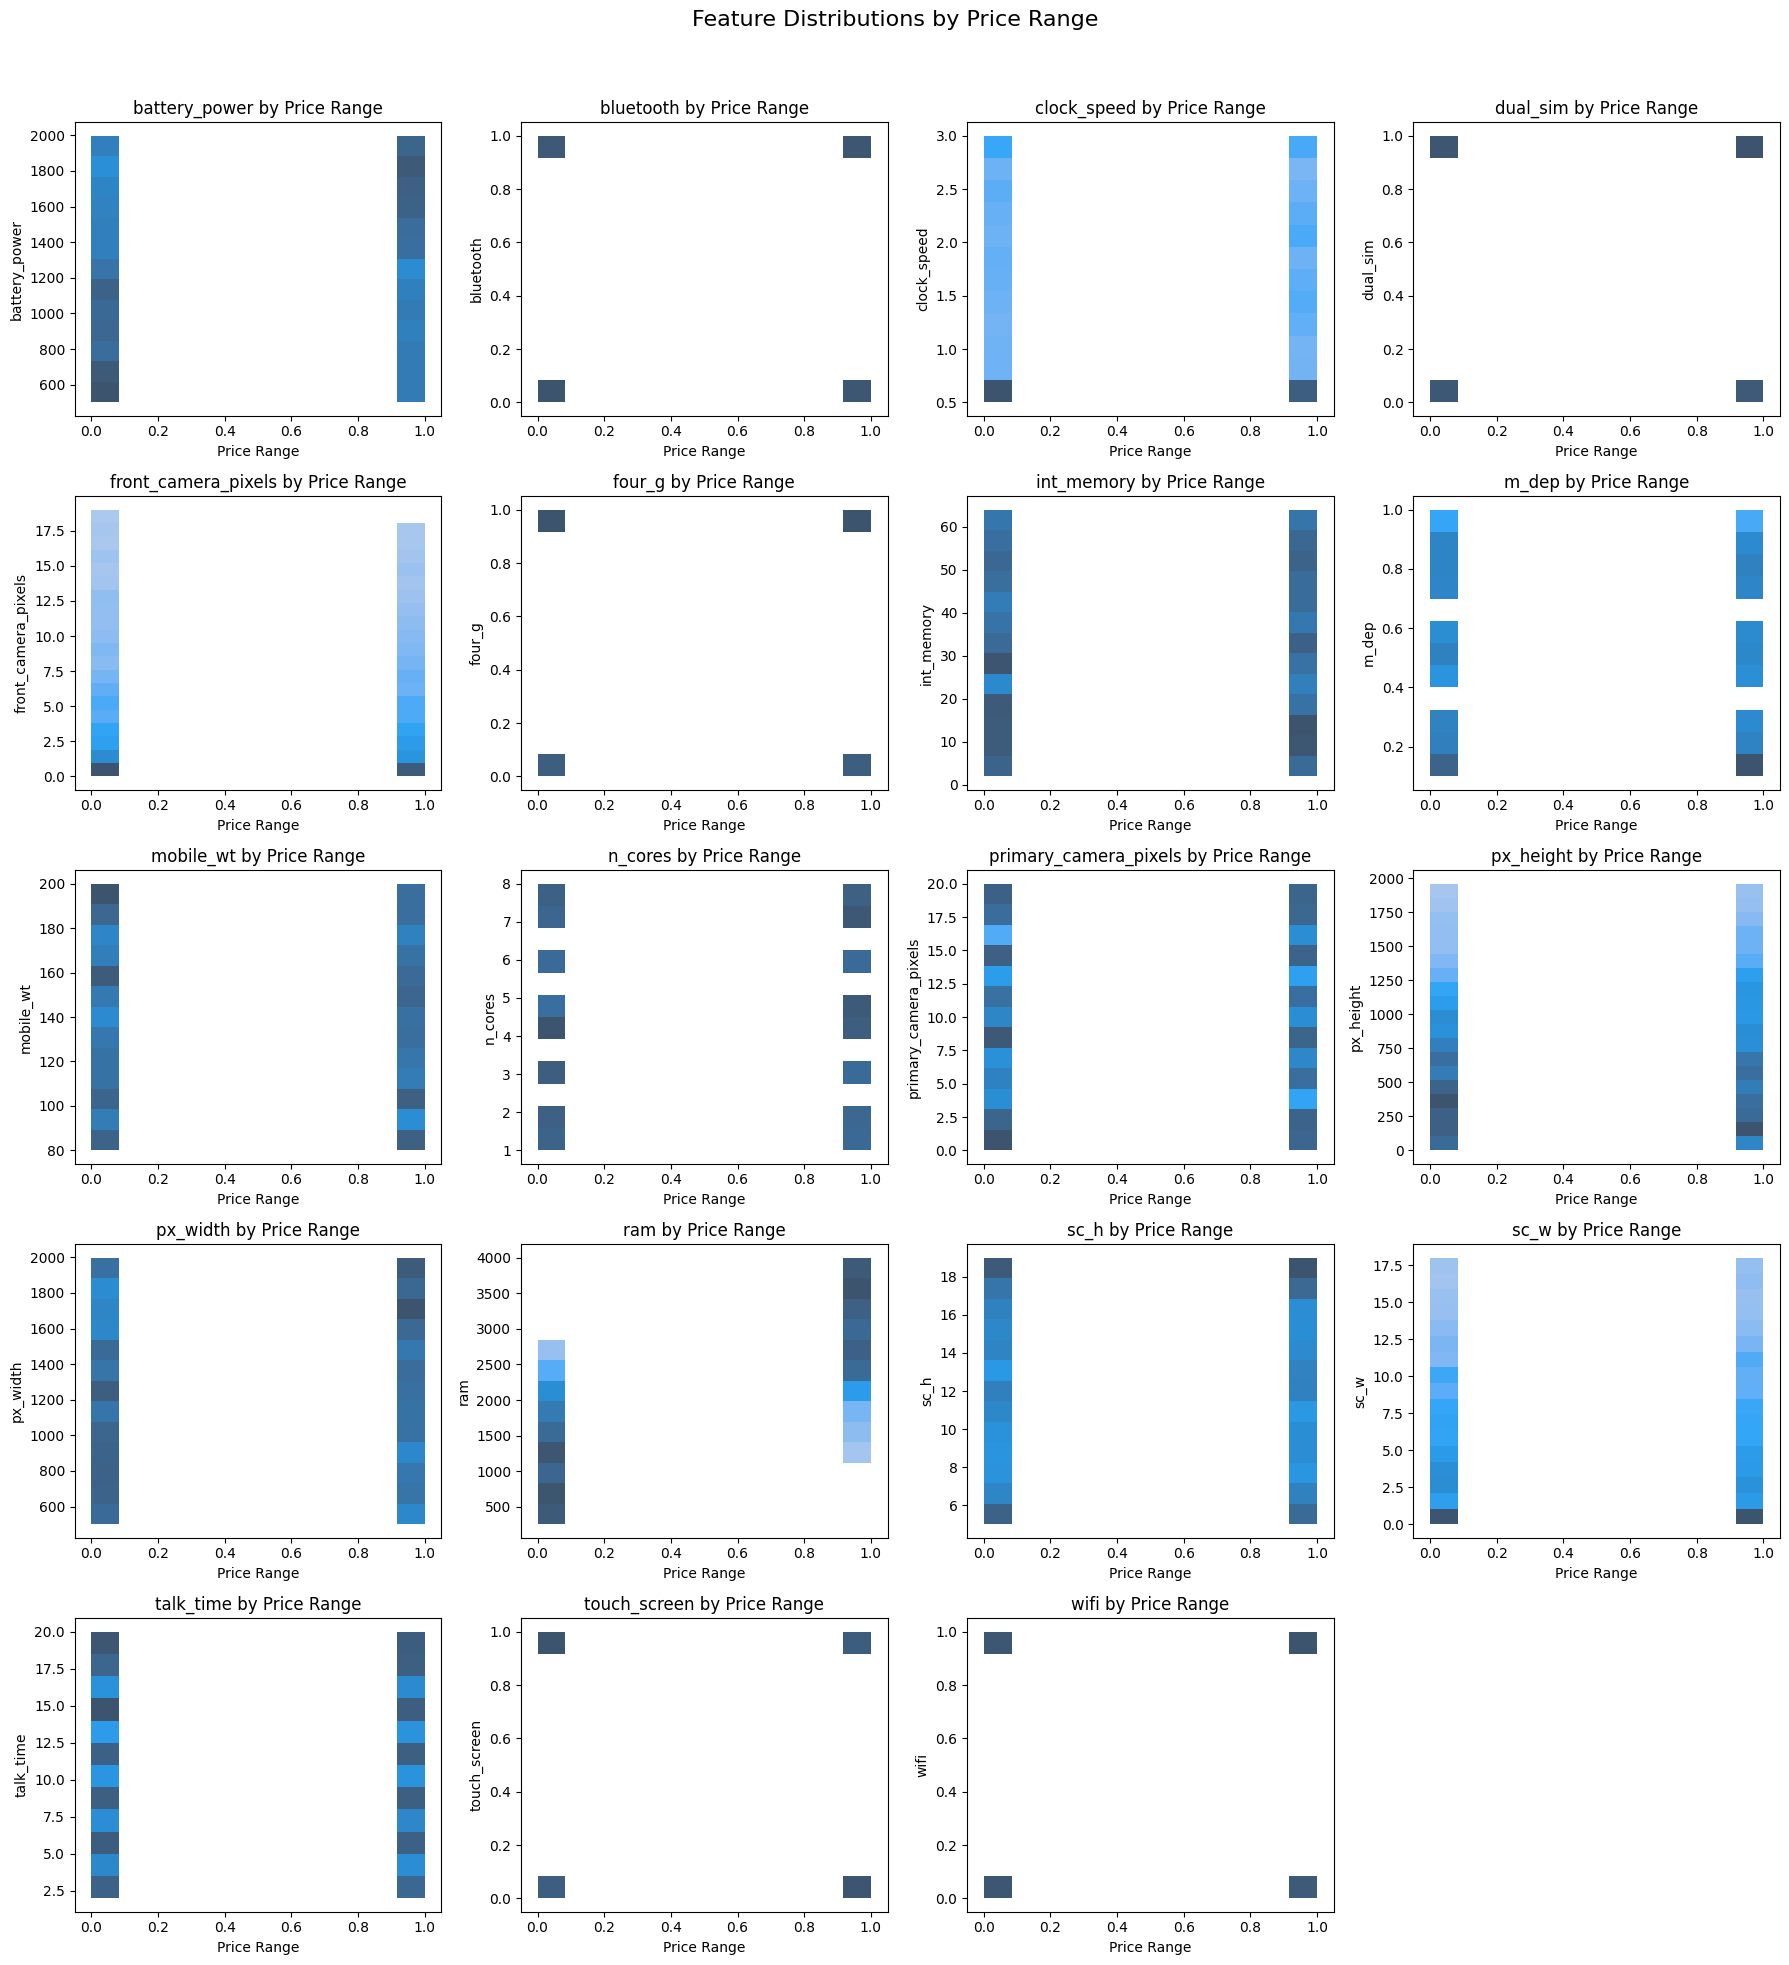

In [58]:
# Define the features to plot
features = train_df.columns.drop(['price_range'])
n_features = len(features)

# Set up the number of rows and columns for subplots
n_cols = 4  # You can adjust the number of columns for layout preference
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

# Create a large figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle("Feature Distributions by Price Range", fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate box plots for each feature
for i, feature in enumerate(features):
    sns.histplot(x='price_range', y=feature, data=train_df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{feature} by Price Range")
    axes[i].set_xlabel("Price Range")
    axes[i].set_ylabel(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, Y, test_size=0.2, random_state=42)

# Models

## Supervised Learning

### Metrics Function

In [60]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # ROC-AUC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=y_test.unique()[1])  # Adjust pos_label for binary/multiclass
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", color="blue")
        plt.plot([0, 1], [0, 1], "k--", color="red")
        plt.title(f"ROC Curve: {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

    else:
        print(f"ROC Curve: Not available for {model_name} (No predict_proba method).")


### KNN Classifier

Best Parameters for KNN: {'n_neighbors': 35, 'weights': 'distance'}

Model: KNN
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Confusion Matrix:
[[179  17]
 [ 20 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       196
           1       0.92      0.90      0.91       204

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



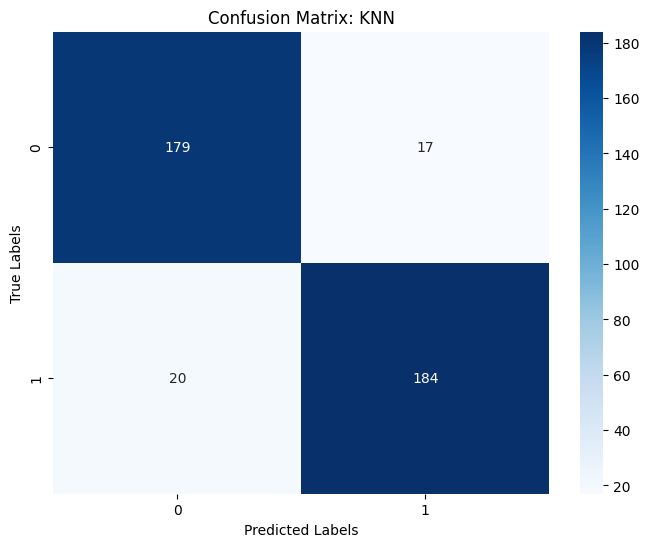

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


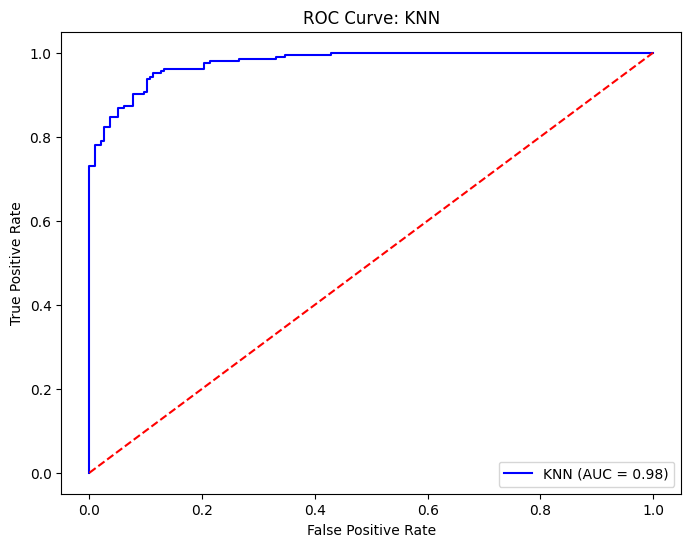

In [61]:
# KNN with GridSearchCV
param_grid_knn = {'n_neighbors': range(10, 40), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters and predictions
print("Best Parameters for KNN:", grid_search_knn.best_params_)
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)

evaluate_model(knn_best, X_train, y_train, X_test, y_test, "KNN")

### Random Forest Classifier

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 181}

Model: Random Forest
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[190   6]
 [  6 198]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       196
           1       0.97      0.97      0.97       204

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



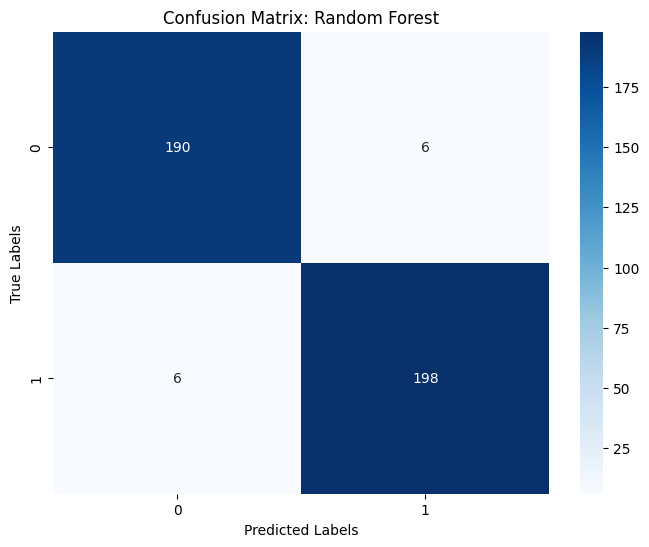

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


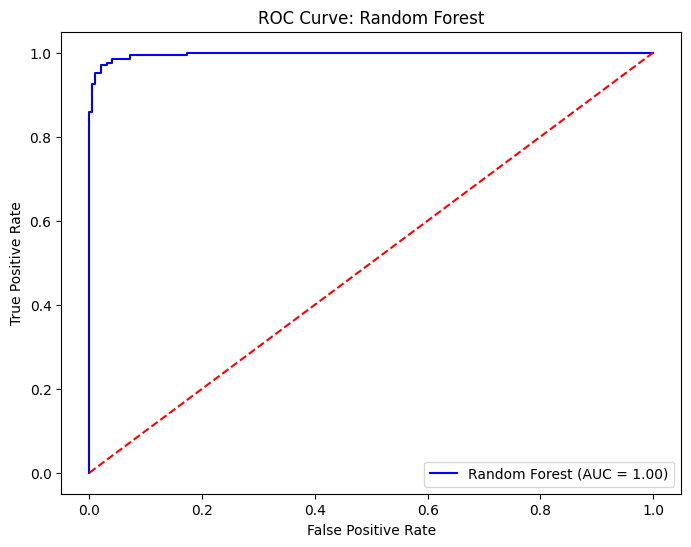

In [62]:
# Random Forest with GridSearchCV
param_grid_rf = {'n_estimators': range(177, 185, 2), 'max_depth': [9, 10, 11]}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and predictions
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
rf_best = grid_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

evaluate_model(rf_best, X_train, y_train, X_test, y_test, "Random Forest")

### Decsion Tree Classifier

Best Parameters for Decision Tree: {'max_depth': 6, 'min_samples_split': 2}

Model: Decsion Tree
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Confusion Matrix:
[[185  11]
 [ 12 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       196
           1       0.95      0.94      0.94       204

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



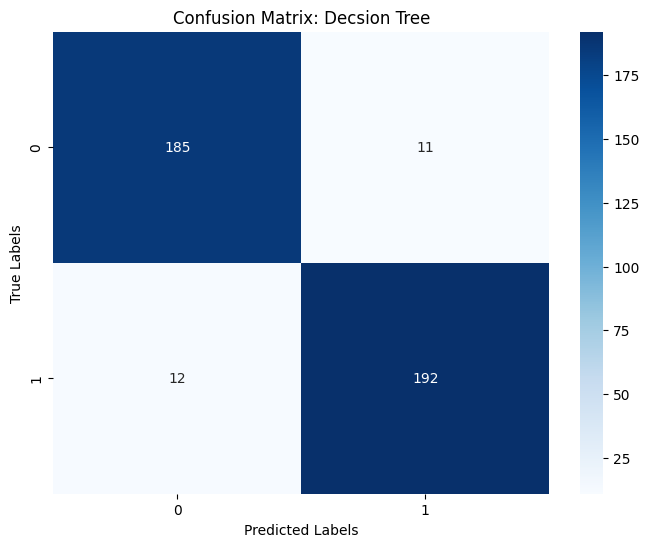

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


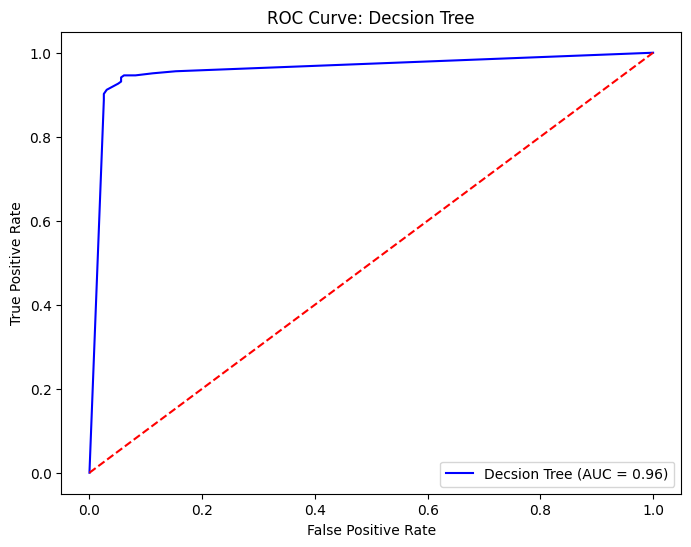

In [63]:
# Decision Tree with GridSearchCV
param_grid_dt = {'max_depth': [6], 'min_samples_split': [2]}
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and predictions
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
dt_best = grid_search_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test)

evaluate_model(dt_best, X_train, y_train, X_test, y_test, "Decsion Tree")

### Naive Bayes


Model: Naive Bayes
Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[183  13]
 [  5 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       196
           1       0.94      0.98      0.96       204

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



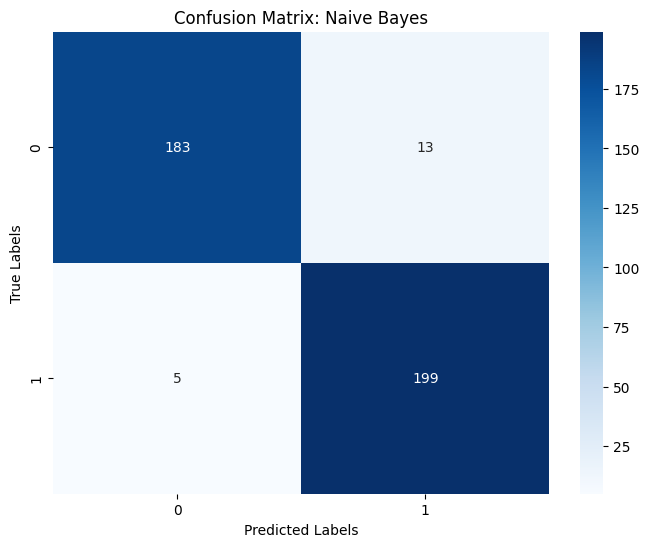

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


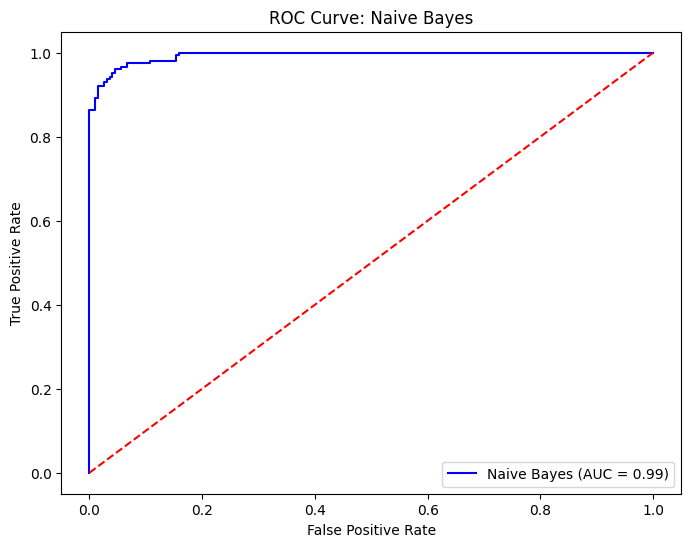

In [64]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

evaluate_model(nb, X_train, y_train, X_test, y_test, "Naive Bayes")

### Quadratic Discriminant Analysis (QDA)


Model: QDA
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[189   7]
 [  7 197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       196
           1       0.97      0.97      0.97       204

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



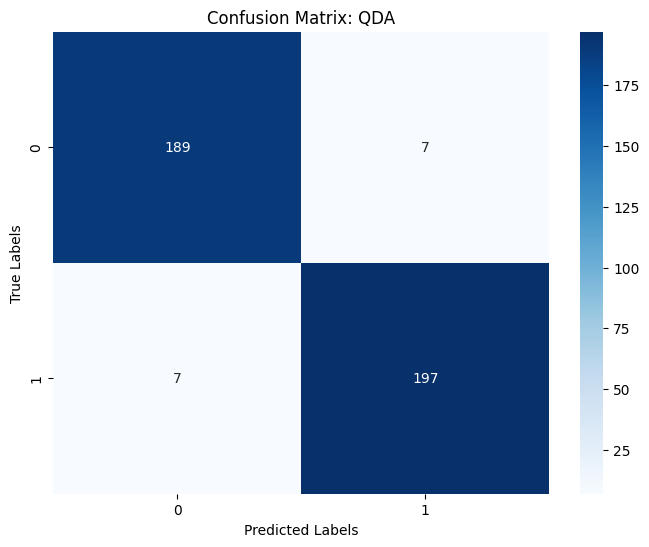

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


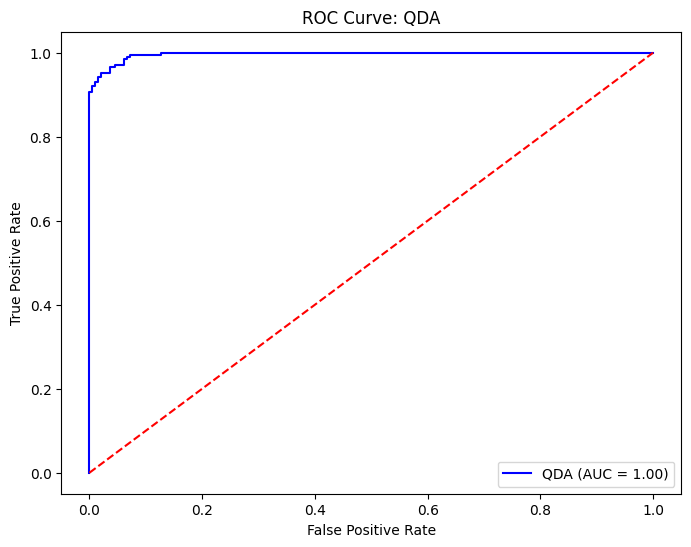

In [65]:
# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

evaluate_model(qda, X_train, y_train, X_test, y_test, "QDA")

### Linear Discriminant Analysis (LDA)


Model: Linear Discriminant Analysis
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[190   6]
 [  5 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       196
           1       0.97      0.98      0.97       204

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



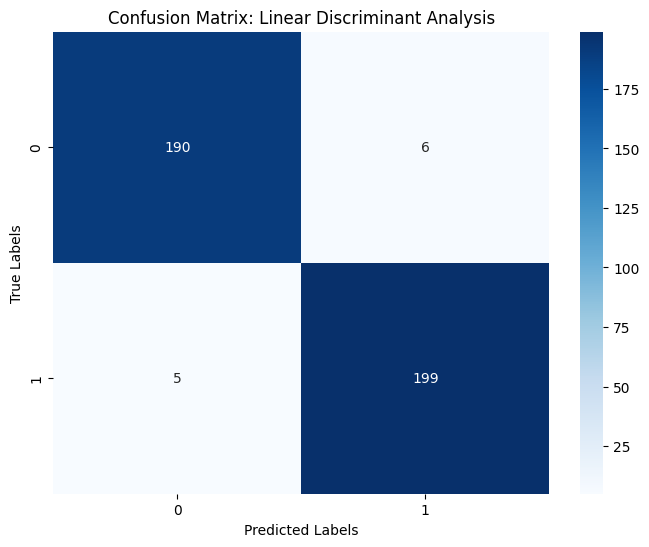

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1264693135.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="red")


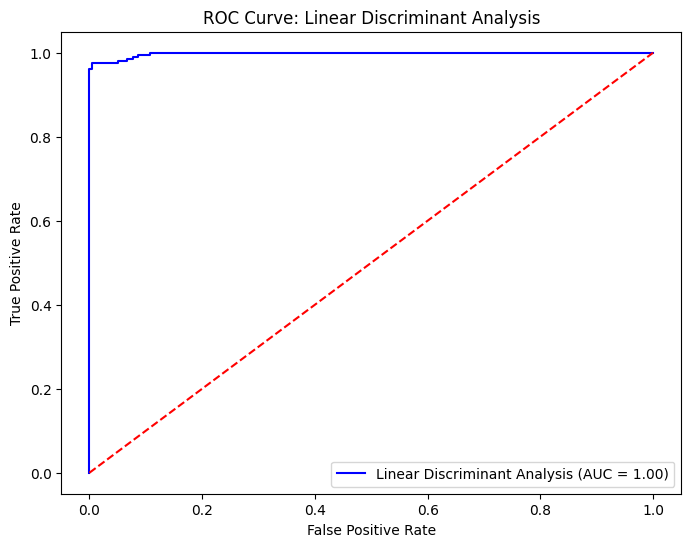

In [66]:
# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on the validation set
y_pred_lda = lda.predict(X_test)

# Evaluate the model
evaluate_model(lda, X_train, y_train, X_test, y_test, "Linear Discriminant Analysis")

In [67]:
def test_all_models(models, X_test, output_file):
    """
    Function to test multiple models on the test dataset and save all predictions to a single CSV file.
    
    Parameters:
        models: A dictionary of model names and their trained models (e.g., {'Random Forest': rf_model}).
        X_test: The features from the test dataset (scaled and preprocessed).
        df: The original test dataframe (used to append predictions).
        output_file: Name of the CSV file to save predictions.
        
    Returns:
        None. Saves predictions to the specified CSV file.
    """
    df = pd.DataFrame()
    # Loop through each model and generate predictions
    for model_name, model in models.items():
        # Predict on the test set
        df[model_name + '_Prediction'] = model.predict(X_test)

    # Save all predictions to a single CSV file
    df.to_csv(output_file, index=False)

    print(f"All model predictions saved to '{output_file}'")

# Dictionary of finalized models
models = {
    'Random Forest': rf_best,
    'KNN': knn_best,
    'LDA': lda,
    'Decision Tree': dt_best,
    'QDA': qda,
    'Naive Bayes': nb
}

# Call the function to test all models and save predictions
test_all_models(models, X_test_scaled, 'all_model_predictions.csv')


All model predictions saved to 'all_model_predictions.csv'


## Unsupervised Learning

### K-Means Clustering

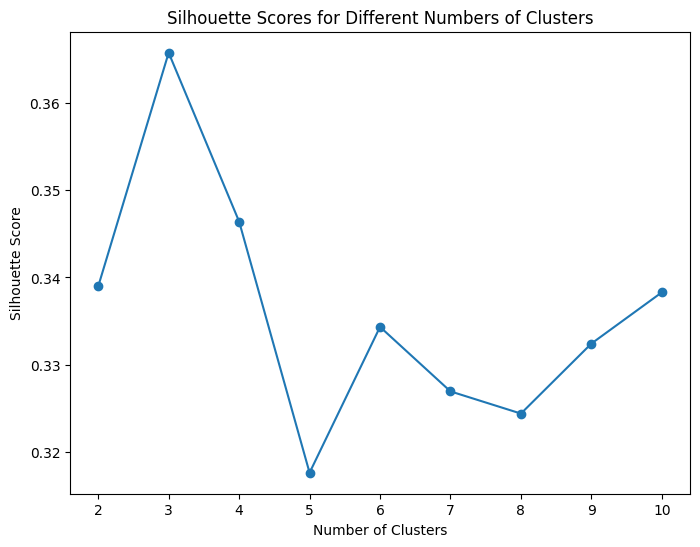

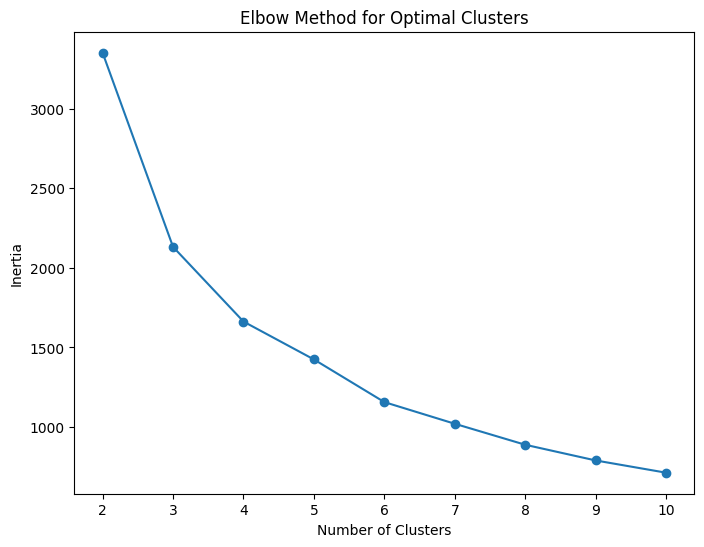

In [68]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # Apply PCA on scaled data

# Range of clusters to evaluate
silhouette_scores = []
inertia_values = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Fit on PCA-transformed data
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))  # Calculate silhouette score on PCA-transformed data

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [69]:
# Apply KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters if needed
kmeans_pca.fit(X_pca)

# Evaluate Silhouette Score
silhouette_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f"Silhouette Score after PCA: {silhouette_pca:.2f}")

Silhouette Score after PCA: 0.37


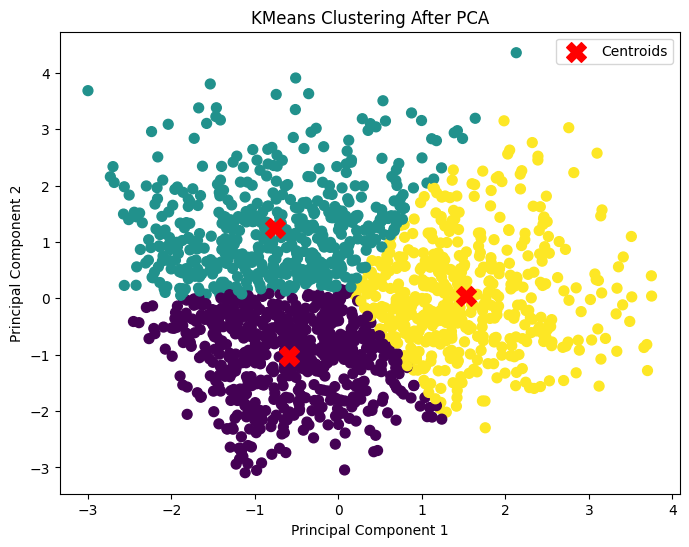

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Hierarchical Clustering

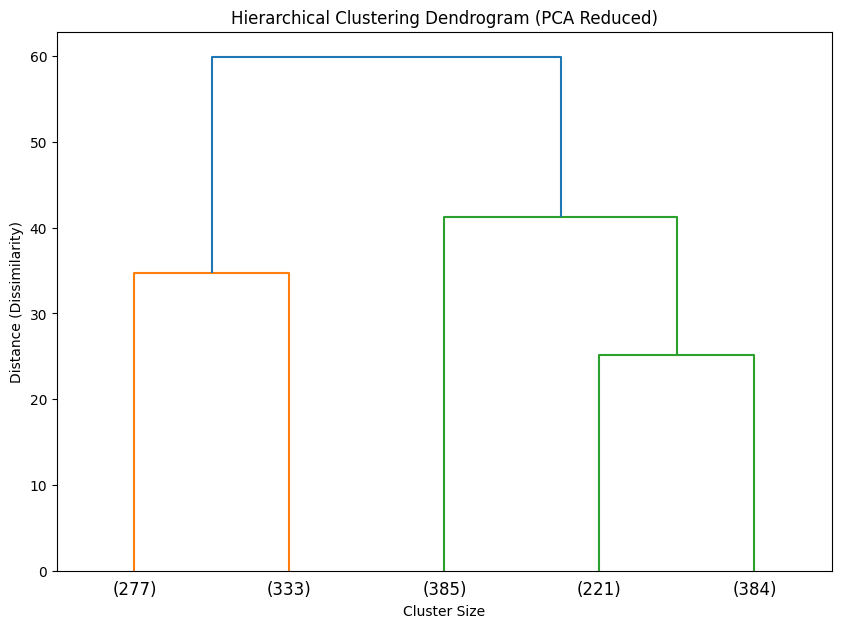

In [71]:
# Linkage for hierarchical clustering
linked = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=5)
plt.title('Hierarchical Clustering Dendrogram (PCA Reduced)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance (Dissimilarity)')
plt.show()


In [72]:
# Cut the dendrogram at a height
cut_height = 50
hierarchical_labels_by_height = fcluster(linked, t=cut_height, criterion='distance')
print(f"Cluster labels (cut at height {cut_height}): {hierarchical_labels_by_height}")

# Extract n clusters from the hierarchical clustering
n = 2
hierarchical_labels = fcluster(linked, t=n, criterion='maxclust')
print("Cluster labels from hierarchical clustering:", hierarchical_labels)

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette_score = silhouette_score(X_pca, hierarchical_labels_by_height)
print(f"Silhouette Score for Hierarchical Clustering (height): {hierarchical_silhouette_score:.2f}")

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette_score = silhouette_score(X_pca, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering (clusters): {hierarchical_silhouette_score:.2f}")



Cluster labels (cut at height 50): [1 2 2 ... 2 1 2]
Cluster labels from hierarchical clustering: [1 2 2 ... 2 1 2]
Silhouette Score for Hierarchical Clustering (height): 0.34
Silhouette Score for Hierarchical Clustering (clusters): 0.34
